<a href="https://colab.research.google.com/github/hlb35/Meso-Data/blob/main/Copy_of_ENVS_617_Assignment_5_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Plotting

In this assignment, you'll be making plots looking at air quality in New Delhi, India between 2015 and 2020. In the process, we'll review some data wrangling and data QA.

The data is from the US embassy in New Delhi from the "Historical" tab at [this link](https://www.airnow.gov/international/us-embassies-and-consulates/#India$New_Delhi)

The data includes hourly measures of particular matter (PM2.5), as well as the associated [Air Quality Index](https://www.airnow.gov/aqi/aqi-basics/) (AQI) and Air Quality Index Category.




## PART 1: SEASONALITY OF AQI IN NEW DELHI

In the following sections, we'll explore the hourly Air Quality Index in New Delhi longitudinally over the past 5 years.

### PART 1.1: Import Packages, Read in and Examine Data

Import `pandas`, `numpy` and `plotnine`.

The raw CSV links are available from the airnow.gov website, so read the data directly using the following code:



```
# a list of URLS with data for each year
links =['https://dosairnowdata.org/dos/historical/NewDelhi/2015/NewDelhi_PM2.5_2015_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2016/NewDelhi_PM2.5_2016_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2017/NewDelhi_PM2.5_2017_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2018/NewDelhi_PM2.5_2018_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2019/NewDelhi_PM2.5_2019_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2020/NewDelhi_PM2.5_2020_YTD.csv']

# This is called list comprehension: it will call read_csv() on every element in the list called links
# It will return a new list of dataframes
dfs = [pd.read_csv(i) for i in links]

# Concatenate all the dataframes in the list dfs into one big data frame
df = pd.concat(dfs)

# preview data
df.head()
```


Display the data size and data types. Look at the distribution of numerical values. For each categorical variable, show the unique values of that field. What do you notice about the values in the `AQI` field, in particular?

In [1]:
from plotnine import *
import plotnine
import pandas as pd
import numpy as np

In [2]:
links =['https://dosairnowdata.org/dos/historical/NewDelhi/2015/NewDelhi_PM2.5_2015_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2016/NewDelhi_PM2.5_2016_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2017/NewDelhi_PM2.5_2017_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2018/NewDelhi_PM2.5_2018_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2019/NewDelhi_PM2.5_2019_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2020/NewDelhi_PM2.5_2020_YTD.csv']

dfs = [pd.read_csv(i) for i in links]

df = pd.concat(dfs)
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


### PART 1.2: Resolve Missing Values in AQI field 

Adjust any missing values in the `AQI` field to be values pandas will recognize as missing and check that what you did worked.

Note: the `QC Name` field is a Quality Conctrol label for the `Raw Conc.` field. The AQI field is based on the `NowCast Conc.`, which is based on the algorithmically calculated [NowCast](https://www.airnow.gov/aqi/aqi-basics/using-air-quality-index/#:~:text=What%20time%20frame%20it%20covers%3A%20The%20NowCast%20shows%20you%20air,such%20as%20during%20a%20wildfire.) value. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51606 entries, 0 to 8782
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           51606 non-null  object 
 1   Parameter      51606 non-null  object 
 2   Date (LT)      51606 non-null  object 
 3   Year           51606 non-null  int64  
 4   Month          51606 non-null  int64  
 5   Day            51606 non-null  int64  
 6   Hour           51606 non-null  int64  
 7   NowCast Conc.  51606 non-null  float64
 8   AQI            51606 non-null  int64  
 9   AQI Category   48758 non-null  object 
 10  Raw Conc.      51606 non-null  float64
 11  Conc. Unit     51606 non-null  object 
 12  Duration       51606 non-null  object 
 13  QC Name        51606 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 5.9+ MB


In [4]:
df[df.AQI == -999]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,New Delhi,PM2.5 - Principal,2020-08-31 06:00 AM,2020,8,31,6,-999.0,-999,NaN,-7.0,UG/M3,1 Hr,Invalid
5837,New Delhi,PM2.5 - Principal,2020-08-31 07:00 AM,2020,8,31,7,-999.0,-999,NaN,-6.0,UG/M3,1 Hr,Invalid
5838,New Delhi,PM2.5 - Principal,2020-08-31 08:00 AM,2020,8,31,8,-999.0,-999,NaN,-5.0,UG/M3,1 Hr,Invalid
5839,New Delhi,PM2.5 - Principal,2020-08-31 09:00 AM,2020,8,31,9,-999.0,-999,NaN,13.0,UG/M3,1 Hr,Valid


In [5]:
df.AQI.replace(-999, pd.NA, inplace=True)

In [6]:
df[df.AQI.isna()]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,<NA>,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,<NA>,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,<NA>,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,<NA>,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,<NA>,NaN,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,New Delhi,PM2.5 - Principal,2020-08-31 06:00 AM,2020,8,31,6,-999.0,<NA>,NaN,-7.0,UG/M3,1 Hr,Invalid
5837,New Delhi,PM2.5 - Principal,2020-08-31 07:00 AM,2020,8,31,7,-999.0,<NA>,NaN,-6.0,UG/M3,1 Hr,Invalid
5838,New Delhi,PM2.5 - Principal,2020-08-31 08:00 AM,2020,8,31,8,-999.0,<NA>,NaN,-5.0,UG/M3,1 Hr,Invalid
5839,New Delhi,PM2.5 - Principal,2020-08-31 09:00 AM,2020,8,31,9,-999.0,<NA>,NaN,13.0,UG/M3,1 Hr,Valid


In [7]:
df.AQI.max()

1191

In [8]:
df.AQI.min()

0

In [9]:
df['Date (LT)'].tail()

8778    2020-12-31 09:00 PM
8779    2020-12-31 10:00 PM
8780    2020-12-31 11:00 PM
8781    2021-01-01 12:00 AM
8782    2021-01-01 01:00 AM
Name: Date (LT), dtype: object

### PART 1.3: Create Time Series Plot
Now, we'll use `plotnine` to create a graph of `AQI` in New Delhi over time. 

To do this, you'll want to create and use a new column with the `Date (LT)` field cast as a `datetime` data type - currently `Date (LT)` is a string. We haven't talked about datatime data types yet, but they are just another datatype like `str` or `int`. The advantage is that `plotnine` will recognize the data as a date and do some automatic formatting for us. To cast the date field as a datetime type, call:

```
df['Date'] = pd.to_datetime(df['Date (LT)'])```




Create your plot of the time trend and format the chart to make it as clear and interpretable as possible. 

Hint: If you are looking to adjust the x axis, you can use `+ scale_x_date()`. `plotnine` treats dates as something inbetween continuous and discrete variables.

In [10]:
df['Date'] = pd.to_datetime(df['Date (LT)'])

In [11]:
df['AQI']=pd.to_numeric(df['AQI'])

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2848 rows containing missing values.


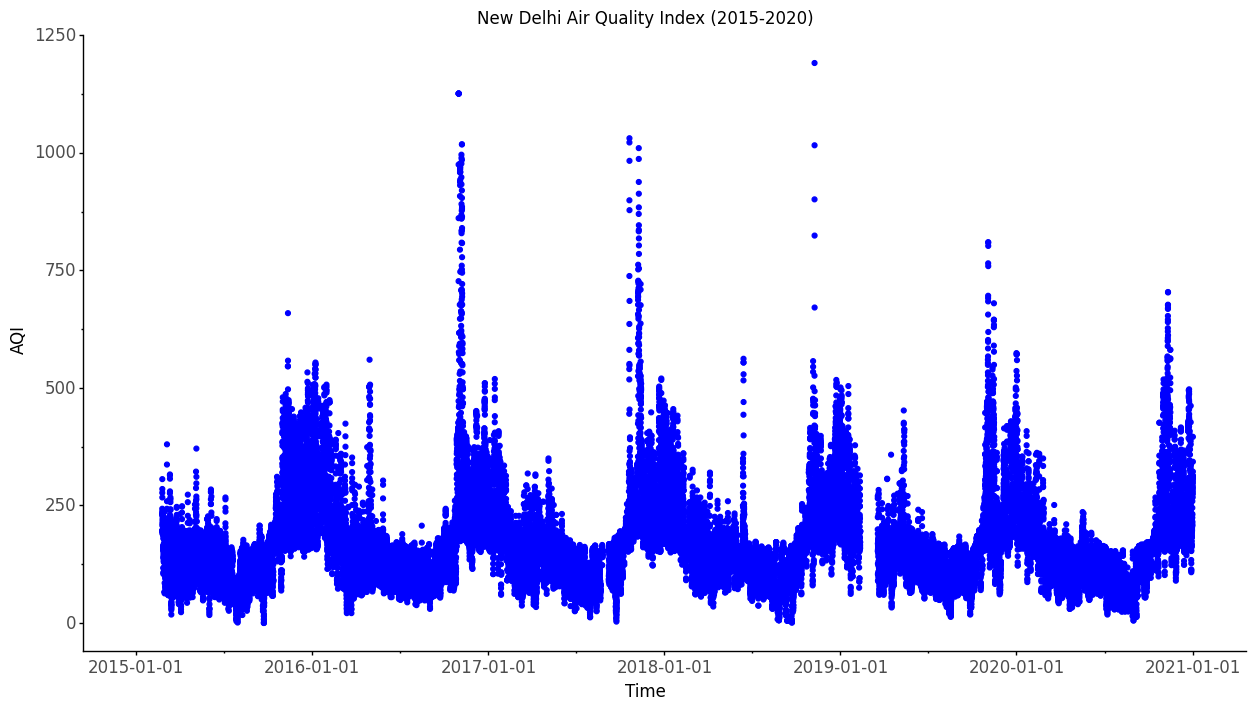

<ggplot: (8745374411231)>

In [12]:
plotnine.options.figure_size = (15, 8)
(
   ggplot(df, aes(x='Date', y='AQI'))
     +geom_point(color = 'blue')
     +xlab('Time')
     +ylab('AQI')
     +ggtitle('New Delhi Air Quality Index (2015-2020)')
     +theme_classic()
     +theme(axis_line=element_line(color='black'),
            axis_ticks=element_line(color='black'),
            text=element_text(size=12))
)

### PART 1.4: Interpret Your Chart
What is your chart saying? Is there a pattern to air quality in New Delhi? Write a sentence or two. 



*There seems to be a cyclical pattern going on. It looks like there is a spike in air quality index in the winter months that gradually declines and is the lowest in the summer months before gradually increasing to a spike again.*

## PART 2: RELATIONSHIP BETWEEN TEMPERATURE AND AQI
Let's explore the relationship between air temperature and air quality in New Delhi. We'll make a bar chart with the average AQI for different temperature ranges.


### PART 2.1: Read in New Delhi Temperature Data

We've again pulled data from [NOAA](https://www.ncdc.noaa.gov/cdo-web/search) - this time for daily air temperature in New Delhi. We've exported the data in °F for 2015-2020.

The data is available on GitHub at the following link:

```
https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/noaa_new_delhi_temp_15_20.csv
```

Read in the data and orient. We'll be using the average daily temperature field, `TAVG`.



In [13]:
url = 'https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/noaa_new_delhi_temp_15_20.csv'
df_noaa = pd.read_csv(url)
df_noaa.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-01,58,NaN,NaN
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-02,58,NaN,NaN
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-03,57,NaN,NaN
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-04,56,NaN,NaN
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-05,55,NaN,NaN


### PART 2.2: Daily Summary

First, answer: how many weather stations do we have data for in New Delhi? 

Then, filter your data to include only the data for the station with the most data records. Check that we now only have one data point per day. 

In [14]:
df_noaa.STATION.unique()

array(['IN022023000', 'IN022021900'], dtype=object)

In [15]:
df_noaa[df_noaa.STATION =='IN022023000'].count()

STATION      2183
NAME         2183
LATITUDE     2183
LONGITUDE    2183
ELEVATION    2183
DATE         2183
TAVG         2183
TMAX         1480
TMIN         1179
dtype: int64

In [16]:
df_noaa[df_noaa.STATION =='IN022021900'].count()

STATION      2185
NAME         2185
LATITUDE     2185
LONGITUDE    2185
ELEVATION    2185
DATE         2185
TAVG         2185
TMAX         1366
TMIN         1904
dtype: int64

In [17]:
df_noaa.groupby('STATION').agg(n_per_station=('DATE', 'count'))

,n_per_station
STATION,
IN022021900,2185
IN022023000,2183


In [18]:
df_noaa_data = df_noaa[df_noaa.STATION == 'IN022021900']
df_noaa_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
2183,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
2184,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-02,58,71.0,50.0
2185,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-03,59,62.0,NaN
2186,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-04,58,66.0,NaN
2187,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-05,57,69.0,46.0


In [19]:
df_noaa_data[df_noaa_data.DATE.duplicated()]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN


In [20]:
df_dates_expand=df_noaa_data.DATE.str.split('-', expand=True)
df_dates_expand.head()

,0,1,2
2183,2015,01,01
2184,2015,01,02
2185,2015,01,03
2186,2015,01,04
2187,2015,01,05


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51606 entries, 0 to 8782
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site           51606 non-null  object        
 1   Parameter      51606 non-null  object        
 2   Date (LT)      51606 non-null  object        
 3   Year           51606 non-null  int64         
 4   Month          51606 non-null  int64         
 5   Day            51606 non-null  int64         
 6   Hour           51606 non-null  int64         
 7   NowCast Conc.  51606 non-null  float64       
 8   AQI            48758 non-null  float64       
 9   AQI Category   48758 non-null  object        
 10  Raw Conc.      51606 non-null  float64       
 11  Conc. Unit     51606 non-null  object        
 12  Duration       51606 non-null  object        
 13  QC Name        51606 non-null  object        
 14  Date           51606 non-null  datetime64[ns]
dtypes: datetime64[ns](1)

In [22]:
df_dates_expand=df_dates_expand.astype('int64')

In [23]:
df_noaa_data[['Year', 'Month', 'Day']]=df_dates_expand
df_noaa_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,Year,Month,Day
2183,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,2015,1,1
2184,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-02,58,71.0,50.0,2015,1,2
2185,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-03,59,62.0,NaN,2015,1,3
2186,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-04,58,66.0,NaN,2015,1,4
2187,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-05,57,69.0,46.0,2015,1,5


### PART 2.3: Join temperature and air quality data
Join together the hourly AQI data and the filtered daily temperature data using year, month, and day. Only keep the days where you have a record in both datasets.  The AQI data is hourly, so you will have ~24 rows per day. This is ok. In the next step, we'll aggregate over the hourly data.

Check the shapes of the dataframes before and
after the merge.


Hint: You will need to create a key (or keys) with the same format across dataframes. 



In [24]:
df_AQI = df.copy()
df_AQI.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing,2015-01-01 01:00:00
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing,2015-01-01 02:00:00
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing,2015-01-01 03:00:00
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing,2015-01-01 04:00:00
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,NaN,NaN,-999.0,UG/M3,1 Hr,Missing,2015-01-01 05:00:00


In [25]:
df_temp=df_noaa_data.copy()
df_temp.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,Year,Month,Day
2183,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,2015,1,1
2184,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-02,58,71.0,50.0,2015,1,2
2185,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-03,59,62.0,NaN,2015,1,3
2186,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-04,58,66.0,NaN,2015,1,4
2187,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-05,57,69.0,46.0,2015,1,5


In [26]:
df_AQI_temp= df_AQI.merge(df_temp,
             how='inner',
             on=['Year', 'Month', 'Day'])
df_AQI_temp.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,Date,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,NaN,NaN,...,2015-01-01 01:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,NaN,NaN,...,2015-01-01 02:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,NaN,NaN,...,2015-01-01 03:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,NaN,NaN,...,2015-01-01 04:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,NaN,NaN,...,2015-01-01 05:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0


In [27]:
df_AQI_temp.shape

(51436, 24)

In [28]:
df_AQI.shape

(51606, 15)

### PART 2.4: Convert and Bucket Temperature & Aggregate Data 

Let's assume that this chart will be for an audience in India. 

Convert the temperature data to Celsius.


Then, create a new column that buckets the Celsius temperature values. Create the following buckets (inclusive of the lower boundary, exclusive of the upper boundary, which happens to be the default behavior of `pd.cut()` 😊 )
- \<10, 
- 10-15
- 15-20
- 20-25
- 25-30
- 30-35
- 35-40

Then, aggregate the data by temperature bucket and calculate a) the mean AQI for that temperature range and b) the standard deviation of the AQI for that temperature range



In [29]:
df_AQI_temp['TAVG_C']=(df_AQI_temp['TAVG']-32) * 5/9
df_AQI_temp.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TAVG_C
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,NaN,NaN,...,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,NaN,NaN,...,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,NaN,NaN,...,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,NaN,NaN,...,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,NaN,NaN,...,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0


In [30]:
df_AQI_temp['c_buckets']= pd.cut(df_AQI_temp.TAVG_C,
                   bins = [-np.inf, 10, 15, 20, 25, 30, 35, 40],
                   labels= ['<10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']
                   )
df_AQI_temp.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TAVG_C,c_buckets
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15


In [31]:
df_tempvAQI= df_AQI_temp.groupby('c_buckets').agg(MEAN_AQI =('AQI', 'mean'), SDV_AQI= ('AQI', 'std'))
df_tempvAQI= df_tempvAQI.reset_index()
df_tempvAQI.head()

,c_buckets,MEAN_AQI,SDV_AQI
0,<10,287.962500,80.402561
1,10-15,253.593560,84.710132
2,15-20,240.405555,101.486672
3,20-25,206.580352,119.154458
4,25-30,127.330224,58.420063


### PART 2.5: Plot a Bar Chart of Bucketed Temperature vs. AQI

Use `plotnine` to create a bar graph of temperature bucket vs. AQI in New Delhi. Include information about the AQI standard deviation. Fine tune the plot to make it as clear as possible. Feel free to get creative here. (You may find it helpful to use the category and color designations [here](https://www.airnow.gov/aqi/aqi-basics/) - or you may decide that's superfluous!)

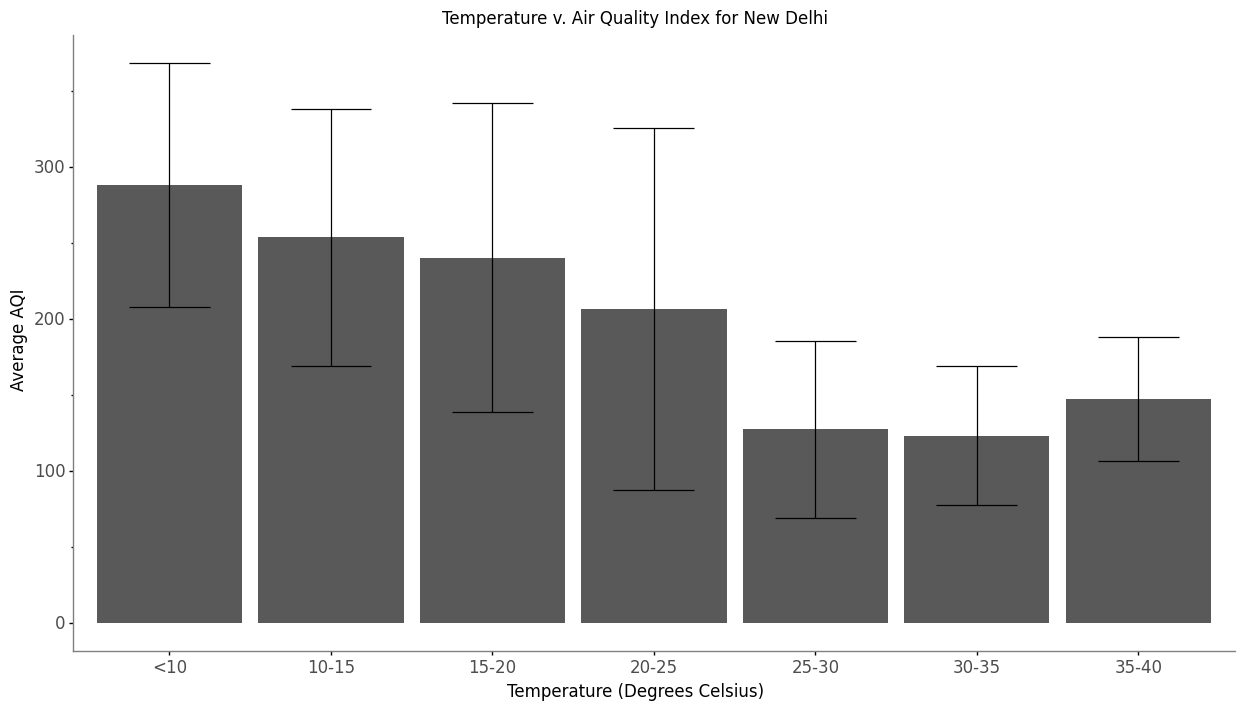

<ggplot: (8745368045719)>

In [42]:
plotnine.options.figure_size= (15, 8)
(
  ggplot(df_tempvAQI, aes(x='c_buckets', y='MEAN_AQI'))
    +geom_bar(stat='identity')
    +geom_errorbar(aes(ymin='MEAN_AQI-SDV_AQI', ymax='MEAN_AQI+SDV_AQI'))
    +xlab('Temperature (Degrees Celsius)')
    +ylab('Average AQI')
    +ggtitle('Temperature v. Air Quality Index for New Delhi')
    +theme_classic()
    +theme(axis_line=element_line(color='gray'),
           axis_ticks=element_line(color='gray'),
           text=element_text(size = 12))
)

### PART 2.6: Interpret Your Chart
What is the chart saying? Is there a relationship between air temperature and air quality in New Delhi? Write a sentence or two.

*This chart is showing that there is a relationship between air temperature and air quality. As the air temperature increases, the average air quality index decreasing, meaning that air quality goes down as temperature goes up.*

## PART 3: MAKE YOU OWN CHART

It's your turn! What are you curious about in this data? 

Write your question below, then create your own chart exporing that question. Feel free to bring in additional data if there is something particular that you're curious about (very optional).

As always, fine tune your chart to make it as clear as possible.

*Question: How has the air quality index changed over the years for each month?*

*I want to plot for each month individually. I want to plot AQI for the month of January separated by year 2015-2020, for February, for March, etc.*

In [43]:
df_AQI_temp.head()
df_AQI_temp

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TAVG_C,c_buckets
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,NaN,NaN,...,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,15.0,10-15


/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 2848 rows containing missing values.


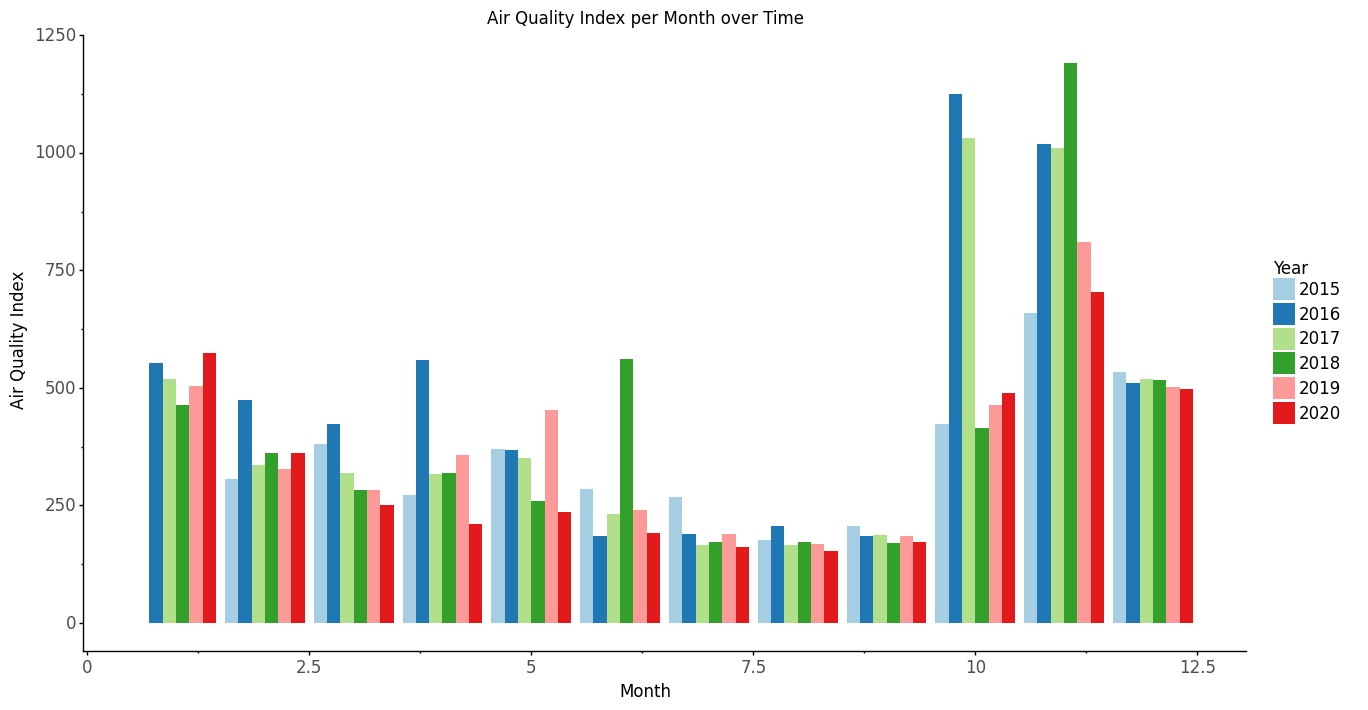

<ggplot: (8745359495126)>

In [49]:
plotnine.options.figure_size=(15,8)
(
    ggplot(df_AQI_temp)
      +geom_bar(stat='identity', mapping = aes(x='Month', y='AQI', fill='reorder(Year, AQI)'), position='dodge')
      +xlab('Month')
      +ylab('Air Quality Index')
      +ggtitle('Air Quality Index per Month over Time')
      +labs(fill='Year')
      +theme_classic()
      +theme(axis_line=element_line(color='black'),
             axis_ticks=element_line(color='black'),
             text=element_text(size=12))
      +scale_fill_brewer(type='qual', palette='Paired')
)

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 2848 rows containing missing values.


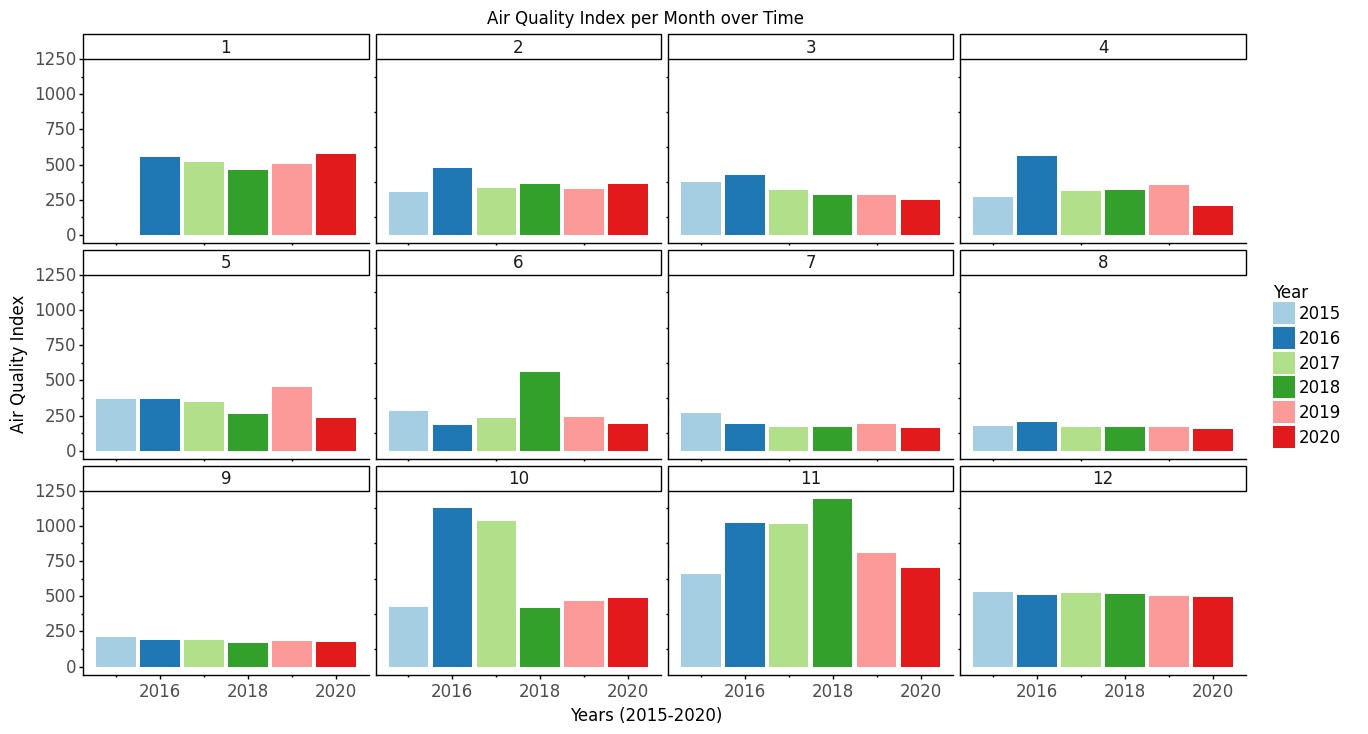

<ggplot: (8745374369549)>

In [56]:
plotnine.options.figure_size=(15,8)
(
    ggplot(df_AQI_temp, aes(x='Year', y='AQI', fill='reorder(Year, AQI)'))
      +geom_bar(stat='identity', position='dodge')
      +facet_wrap(facets='Month')
      +xlab('Years (2015-2020)')
      +ylab('Air Quality Index')
      +ggtitle('Air Quality Index per Month over Time')
      +labs(fill='Year')
      +theme_classic()
      +theme(axis_line=element_line(color='black'),
             axis_ticks=element_line(color='black'),
             text=element_text(size=12))
      +scale_fill_brewer(type='qual', palette='Paired')
)